# Distribution check

In the dataset of latents, we have 4 classes: {UM_1, NYU} x {DX_GROUP = 1, DX_GROUP = 2}. In this notebook, we check wheter data in these classes follow Normal distribution.


In [30]:
from Data.Dataset import LatentFMRIDataset
import matplotlib.pyplot as plt
%matplotlib inline
from einops import rearrange
from statsmodels.graphics.gofplots import qqplot
from scipy.stats import shapiro, normaltest, anderson

In [2]:
nyu_data_directory = '/Users/balazsmorvay/PycharmProjects/VAE/Assets/NYU_all'
um1_data_directory = '/Users/balazsmorvay/PycharmProjects/VAE/Assets/UM_1_all'
nyu_dataset = LatentFMRIDataset(data_dir=nyu_data_directory)
um1_dataset = LatentFMRIDataset(data_dir=um1_data_directory)

In [10]:
nyu_1 = rearrange(nyu_dataset.get_items_from_class(cls=1)['X'], 'a b c d -> (a b c d)')
nyu_2 = rearrange(nyu_dataset.get_items_from_class(cls=2)['X'], 'a b c d -> (a b c d)')
um1_1 = rearrange(um1_dataset.get_items_from_class(cls=1)['X'], 'a b c d -> (a b c d)')
um1_2 = rearrange(um1_dataset.get_items_from_class(cls=2)['X'], 'a b c d -> (a b c d)')

In [12]:
nyu_1.shape, nyu_2.shape, um1_1.shape, um1_2.shape

((14515200,), (19555200,), (11554560,), (15632640,))

# Histogram

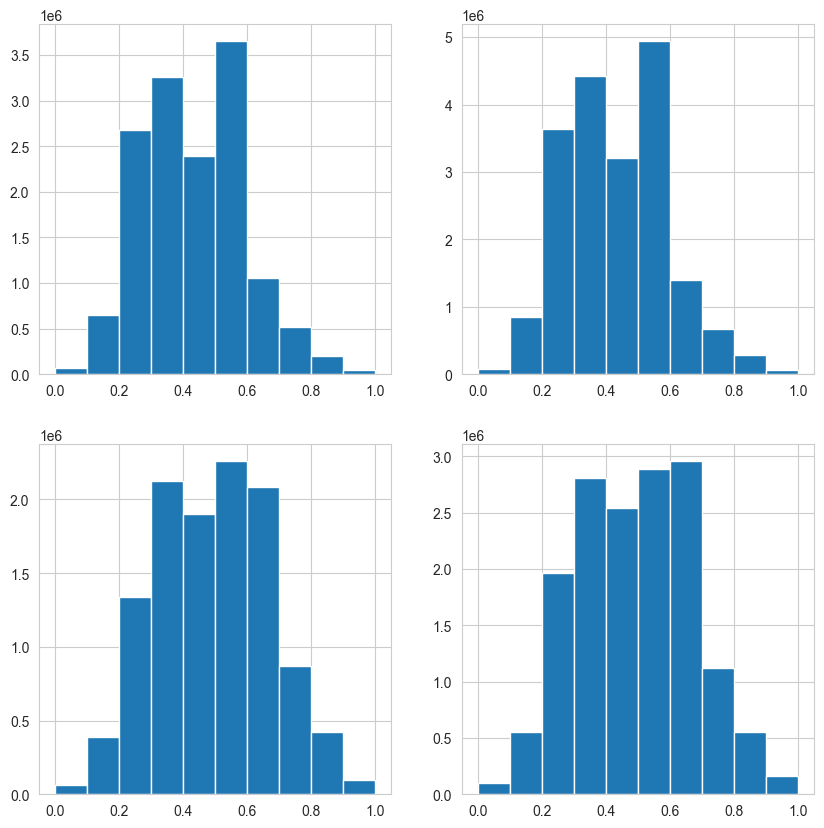

In [17]:
f, axarr = plt.subplots(2, 2, figsize=(10, 10))
axarr[0, 0].hist(nyu_1)
axarr[0, 1].hist(nyu_2)
axarr[1, 0].hist(um1_1)
axarr[1, 1].hist(um1_2)
plt.show()

# QQPlot

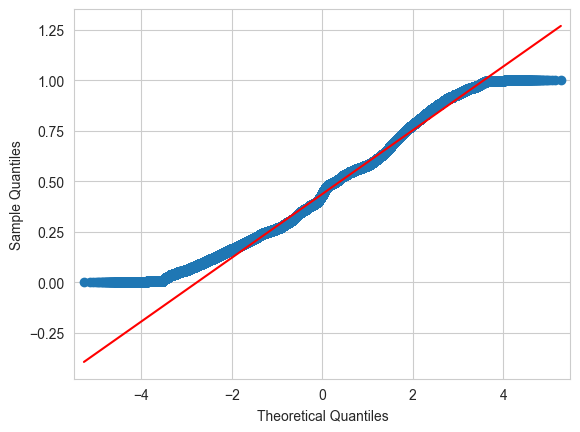

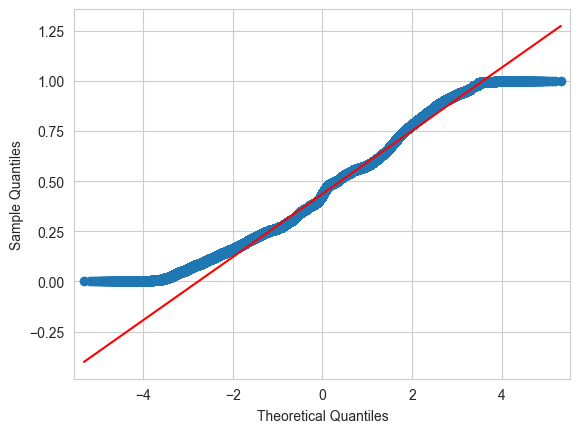

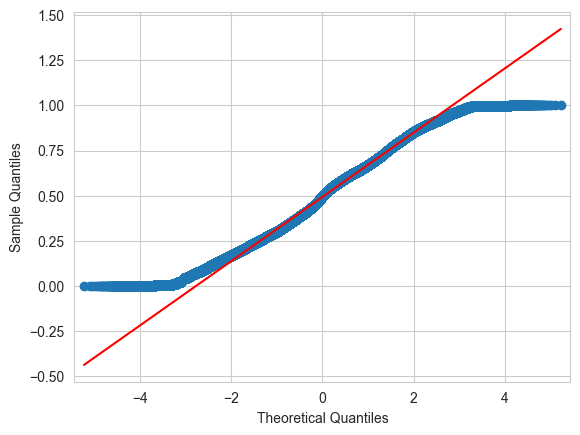

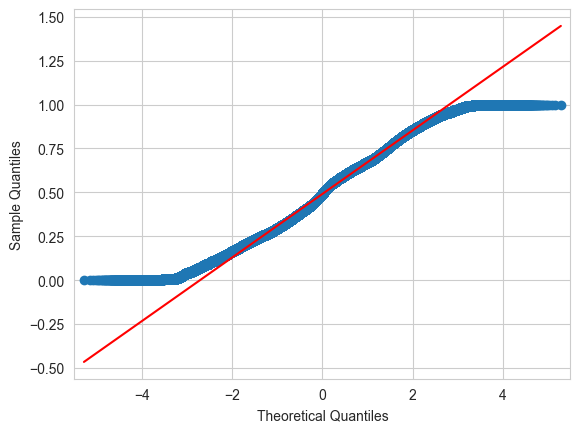

In [22]:
qqplot(data=nyu_1, line='s')
qqplot(data=nyu_2, line='s')
qqplot(data=um1_1, line='s')
qqplot(data=um1_2, line='s')
plt.show()

# Saphiro-Wilk test

In [27]:
for data in [nyu_1, nyu_2, um1_1, um1_2]:
    stat, p = shapiro(data)
    print('Statistics=%.3f, p=%.3f' % (stat, p))
    if p > 0.05:
        print('Sample looks Gaussian (fail to reject H0)')
    else:
        print('Sample does not look Gaussian (reject H0)')

/var/folders/z_/7fqm4zqs11zdv7cm41c6w_pc0000gn/T/ipykernel_42454/660632307.py:2: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 14515200.
  stat, p = shapiro(data)


Statistics=0.985, p=0.000
Sample does not look Gaussian (reject H0)


/var/folders/z_/7fqm4zqs11zdv7cm41c6w_pc0000gn/T/ipykernel_42454/660632307.py:2: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 19555200.
  stat, p = shapiro(data)


Statistics=0.984, p=0.000
Sample does not look Gaussian (reject H0)


/var/folders/z_/7fqm4zqs11zdv7cm41c6w_pc0000gn/T/ipykernel_42454/660632307.py:2: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 11554560.
  stat, p = shapiro(data)


Statistics=0.992, p=0.000
Sample does not look Gaussian (reject H0)
Statistics=0.990, p=0.000
Sample does not look Gaussian (reject H0)


/var/folders/z_/7fqm4zqs11zdv7cm41c6w_pc0000gn/T/ipykernel_42454/660632307.py:2: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 15632640.
  stat, p = shapiro(data)


# D'Agostino K^2 test

In [29]:
for data in [nyu_1, nyu_2, um1_1, um1_2]:
    stat, p = normaltest(data)
    print('Statistics=%.3f, p=%.3f' % (stat, p))
    if p > 0.05:
        print('Sample looks Gaussian (fail to reject H0)')
    else:
        print('Sample does not look Gaussian (reject H0)')

Statistics=215813.685, p=0.000
Sample does not look Gaussian (reject H0)
Statistics=299820.514, p=0.000
Sample does not look Gaussian (reject H0)
Statistics=320069.066, p=0.000
Sample does not look Gaussian (reject H0)
Statistics=506807.715, p=0.000
Sample does not look Gaussian (reject H0)


# Anderson-Darling test

In [31]:
for data in [nyu_1, nyu_2, um1_1, um1_2]:
    result = anderson(data)
    print('Statistic: %.3f' % result.statistic)
    for i in range(len(result.critical_values)):
        sl, cv = result.significance_level[i], result.critical_values[i]
        if result.statistic < result.critical_values[i]:
            print('%.3f: %.3f, data looks normal (fail to reject H0)' % (sl, cv))
        else:
            print('%.3f: %.3f, data does not look normal (reject H0)' % (sl, cv))

Statistic: 76346.018
15.000: 0.576, data does not look normal (reject H0)
10.000: 0.656, data does not look normal (reject H0)
5.000: 0.787, data does not look normal (reject H0)
2.500: 0.918, data does not look normal (reject H0)
1.000: 1.092, data does not look normal (reject H0)
Statistic: 105352.367
15.000: 0.576, data does not look normal (reject H0)
10.000: 0.656, data does not look normal (reject H0)
5.000: 0.787, data does not look normal (reject H0)
2.500: 0.918, data does not look normal (reject H0)
1.000: 1.092, data does not look normal (reject H0)
Statistic: 33689.808
15.000: 0.576, data does not look normal (reject H0)
10.000: 0.656, data does not look normal (reject H0)
5.000: 0.787, data does not look normal (reject H0)
2.500: 0.918, data does not look normal (reject H0)
1.000: 1.092, data does not look normal (reject H0)
Statistic: 55728.213
15.000: 0.576, data does not look normal (reject H0)
10.000: 0.656, data does not look normal (reject H0)
5.000: 0.787, data does